In [55]:
from __future__ import division
import pandas as pd
import numpy as np
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process 
import datetime
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv') #release date, gross revenue/production budget
title_basics = pd.read_csv('imdb.title.basics.csv') #genres

## Changing data type of monetary values to compute for total profit 

In [57]:
#movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
#movie_budgets['production_budget'].astype('int')
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')


In [58]:
movie_budgets['gross_profits'] = movie_budgets.apply(lambda x: (x['domestic_gross'] + x['worldwide_gross']) - x['production_budget'], axis=1)
movie_budgets['gross_revenue'] = movie_budgets.apply(lambda x: (x['domestic_gross'] + x['worldwide_gross']), axis=1)

## Joining 'imdb.title.basics.csv' with 'tn.movie_budgets.csv'

In [59]:
movie_budgets.set_index('movie', inplace=True)

In [60]:
title_basics.rename(columns={'primary_title': 'movie'}, inplace=True)

In [61]:
title_basics.set_index('movie', inplace=True)

In [62]:
df_combine = movie_budgets.join(title_basics, how="inner")
df_combine.reset_index(inplace=True)

### Changing data type of 'Release Date' to reflect datetime

In [63]:
df_combine['release_date'] = pd.to_datetime(df_combine['release_date'])

### Creating new df to start analysis on seasonality

In [64]:
time_analysis = df_combine[['release_date', 'movie', 'gross_profits', 'production_budget' , 'genres', 'gross_revenue']]

In [65]:
time_analysis['month'] = pd.DatetimeIndex(time_analysis['release_date']).month

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creating a function to account for seasonality given sliced month from datetime.

In [66]:
def seasonality(x):
    if (x > 11 or x <= 3):
        return "Winter"
    elif(x == 4 or x == 5):
        return "Spring"
    elif(x >= 6 and x <= 9):
        return "Summer"
    else:
        return "Fall"


Function to account for month name.


In [67]:
def month_name(x):
     if (x == 1):
        return "Jan"
     if (x == 2):
        return "Feb"
     if (x == 3):
        return "Mar"
     if (x == 4):
        return "Apr"
     if (x == 5):
        return "May"
     if (x == 6):
        return "Jun"
     if (x == 7):
        return "Jul"
     if (x == 8):
        return "Aug"
     if (x == 9):
        return "Sep"
     if (x == 10):
        return "Oct"
     if (x == 11):
        return "Nov"
     if (x == 12):
        return "Dec"

Creating season column for future grouping purposes.

In [68]:
time_analysis['season'] = time_analysis['month'].apply(seasonality)

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
time_analysis['month_name'] = time_analysis['month'].apply(month_name)

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creating year column to group.

In [70]:
time_analysis['year'] = pd.DatetimeIndex(time_analysis['release_date']).year

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Grouping for last 10 years

Performing conditions to group for past 10 years

In [71]:
df_decade_analysis = time_analysis[(time_analysis['year'] >= 2010) & (time_analysis['year'] <= 2019)]

### Chart each seasonal gross profit trend for past decade

In [72]:
df_decade_mean = df_decade_analysis.groupby(['year', 'season'])['gross_profits'].mean()

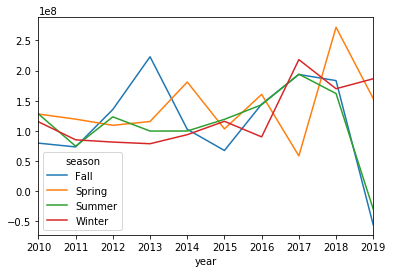

In [73]:
fig = df_decade_mean.unstack().plot(kind = 'line')

plt.savefig("chart1")

### Gross profit by Winter, Spring, Summer, and Fall for past decade

#### Winter

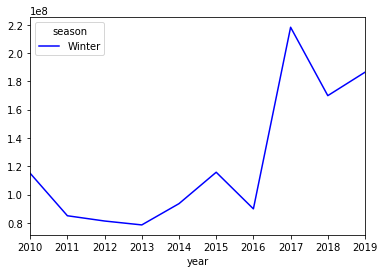

In [104]:
winter_decade = df_decade_analysis[df_decade_analysis['season'] == 'Winter']
winter_decade_mean = winter_decade.groupby(['year', 'season'])['gross_profits'].mean()
winter_decade_mean.unstack().plot(kind = 'line', color='b')

plt.savefig("chart1a")

#### Spring

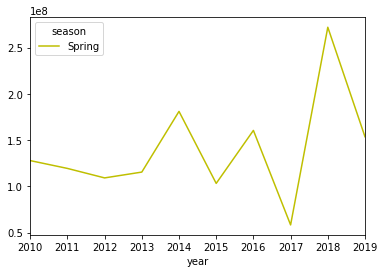

In [75]:
spring_decade = df_decade_analysis[df_decade_analysis['season'] == 'Spring']
spring_decade_mean = spring_decade.groupby(['year', 'season'])['gross_profits'].mean()
spring_decade_mean.unstack().plot(kind = 'line', color='y')

plt.savefig("chart1b")

#### Summer

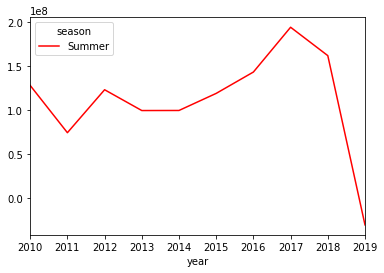

In [76]:
summer_decade = df_decade_analysis[df_decade_analysis['season'] == 'Summer']
summer_decade_mean = summer_decade.groupby(['year', 'season'])['gross_profits'].mean()
summer_decade_mean.unstack().plot(kind = 'line', color='r')

plt.savefig("chart1c")

#### Fall

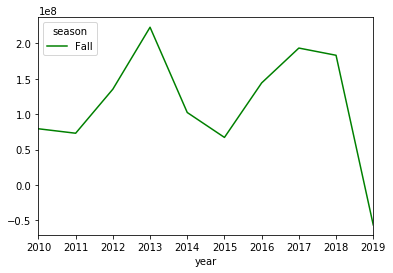

In [77]:
fall_decade = df_decade_analysis[df_decade_analysis['season'] == 'Fall']
fall_decade_mean = fall_decade.groupby(['year', 'season'])['gross_profits'].mean()
fall_decade_mean.unstack().plot(kind = 'line', color='g')

plt.savefig("chart1d")

## Starting 1 year trend analysis between 2017 and 2018

In [78]:
yr20172018 = time_analysis[(time_analysis['year'] >= 2017) & (time_analysis['year'] <= 2018.5)]

In [79]:
yr20172018.reset_index()

index release_date                       movie  gross_profits  \
0        4   2018-01-19                   12 Strong       81938091   
1       37   2017-11-01        A Bad Moms Christmas      171821209   
2       43   2017-07-07               A Ghost Story        4264580   
3       51   2017-01-06             A Monster Calls        7155353   
4       57   2018-04-06               A Quiet Place      505546655   
..     ...          ...                         ...            ...   
384   3761   2017-11-17                      Wonder      417027521   
385   3764   2017-06-02                Wonder Woman     1083696786   
386   3765   2017-06-02                Wonder Woman     1083696786   
387   3766   2017-06-02                Wonder Woman     1083696786   
388   3814   2017-01-20  xXx: Return of Xander Cage      304931772   

     production_budget                     genres  gross_revenue  month  \
0             35000000       Action,Drama,History      116938091      1   
1             28000000           Adventure,Comedy      199821209     11   
2               100000      Drama,Fantasy,Romance        4364580      7   
3             43000000    Animation,Drama,Fantasy       50155353      1   
4             17000000                Documentary      522546655      4   
..                 ...                        ...            ...    ...   
384           20000000               Drama,Family      437027521     11   
385          150000000   Action,Adventure,Fantasy     1233696786      6   
386          150000000                     Sci-Fi     1233696786      6   
387          150000000    Documentary,Drama,Sport     1233696786      6   
388           85000000  Action,Adventure,Thriller      389931772      1   

     season month_name  year  
0    Winter        Jan  2018  
1      Fall        Nov  2017  
2    Summer        Jul  2017  
3    Winter        Jan  2017  
4    Spring        Apr  2018  
..      ...        ...   ...  
384    Fall        Nov  2017  
385  Summer        Jun  2017  
386  Summer        Jun  2017  
387  Summer        Jun  2017  
388  Winter        Jan  2017  

[389 rows x 11 columns]

## Monthly Gross Profit Trend between 2017 and 2018

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


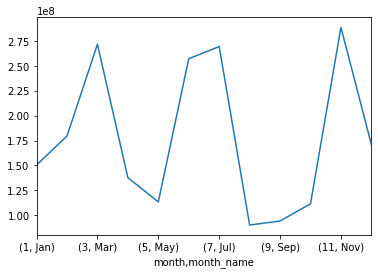

In [99]:
plot20172018 = yr20172018.groupby(('month','month_name'))['gross_profits'].mean()

plot20172018.plot(kind='line', markersize=100)

plt.savefig("chart2a")

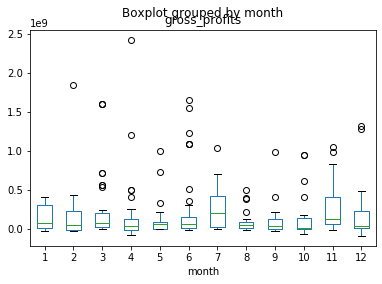

In [81]:
yr20172018.boxplot(by= 'month', column=['gross_profits'], grid = False)

plt.savefig("chart2b")

## Monthly gross profit trend as a mean for past 10 years for comparison 

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


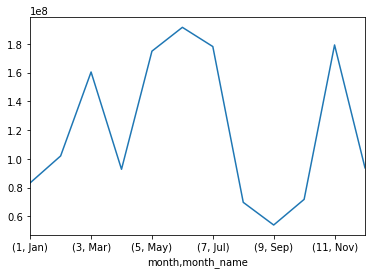

In [103]:
df= df_decade_analysis.groupby(('month','month_name'))['gross_profits'].mean().plot(kind='line')

plt.savefig("chart2c")

#### Corrsponding box plot

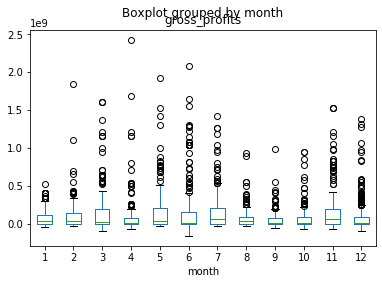

In [83]:
df_decade_analysis.boxplot(by= 'month', column=['gross_profits'], grid = False)

plt.savefig("chart2d")

## Genre/theme analysis

#### Grouping genres by month, gross profits and revenue and production budget

In [84]:
gp_yr20172018 = yr20172018[['gross_profits', 'gross_revenue', 'production_budget', 'genres', 'month']]

In [85]:
gp_yr20172018['genres'] = gp_yr20172018['genres'].astype(object) 

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
gp_yr20172018.reset_index(drop=True, inplace=True)

#### Splitting genres to individual words and associating a weight to each word by finding percent of gross profit for the genre's movie

In [87]:
gp_yr20172018 = gp_yr20172018.dropna(subset=['genres']).reset_index(drop=True)


splitted = gp_yr20172018['genres'].str.split(',')  
l = splitted.str.len()
x = gp_yr20172018['gross_revenue'] / gp_yr20172018['production_budget']

df = pd.DataFrame({'divided': np.repeat(x, l), 'genres_divided':np.concatenate(splitted)}) 


print (df) 


      divided genres_divided
0    3.341088         Action
0    3.341088          Drama
0    3.341088        History
1    7.136472      Adventure
1    7.136472         Comedy
..        ...            ...
384  8.224645          Drama
384  8.224645          Sport
385  4.587433         Action
385  4.587433      Adventure
385  4.587433       Thriller

[905 rows x 2 columns]


#### Joining both columns to 2017 2018 table created earlier

In [88]:
gp_yr20172018 = gp_yr20172018.join(df)

#### Grouping dates by season to eventually plot popularity (divided column) of genres given gross profit of each movie

In [89]:
gp_yr20172018 = gp_yr20172018.loc[gp_yr20172018['gross_profits'] >= 0]

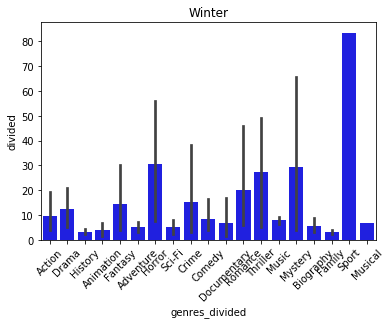

In [90]:
gp_yr20172018_winter = gp_yr20172018[(gp_yr20172018['month'] == 12) | (gp_yr20172018['month'] >= 1) & (gp_yr20172018['month'] <= 2)]
gp_yr20172018_winter.groupby('divided').mean().reset_index()
g=sns.barplot(x='genres_divided',y='divided',color="b", data=gp_yr20172018_winter)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Winter")

plt.savefig("chart3a")

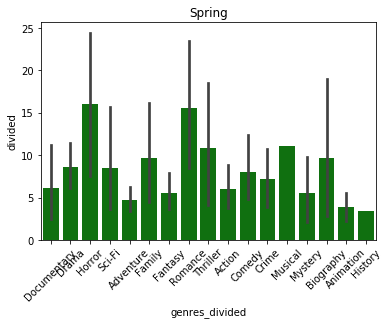

In [91]:
gp_yr20172018_spring = gp_yr20172018[(gp_yr20172018['month'] >= 3) & (gp_yr20172018['month'] <= 5)]

gp_yr20172018_spring.groupby('divided').mean().reset_index()
g=sns.barplot(x='genres_divided',y='divided',color="g", data=gp_yr20172018_spring)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Spring")


plt.savefig("chart3b")

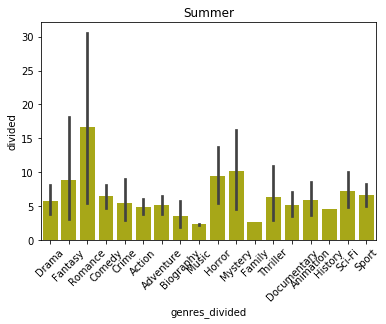

In [92]:
gp_yr20172018_summer = gp_yr20172018[(gp_yr20172018['month'] >= 6) & (gp_yr20172018['month'] <= 9)]

gp_yr20172018_summer.groupby('divided').mean().reset_index()
g=sns.barplot(x='genres_divided',y='divided',color="y", data=gp_yr20172018_summer)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Summer")


plt.savefig("chart3c")

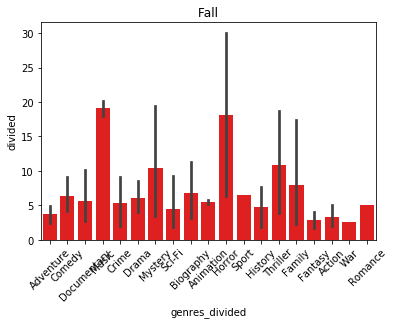

In [93]:
gp_yr20172018_fall = gp_yr20172018[(gp_yr20172018['month'] >= 10) & (gp_yr20172018['month'] <= 11)]
gp_yr20172018_fall.groupby('divided').max().reset_index()
g=sns.barplot(x='genres_divided',y='divided',color="r", data=gp_yr20172018_fall)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Fall")

plt.savefig("chart3d")